In [140]:
import pandas as pd
import os
inpath = './data'
files = os.listdir(inpath)
dfs = []
col_names = ['연번', '날짜', '호선', '역번호', '역명', '구분', '06시 이전', '06시-07시', '07시-08시',
       '08시-09시', '09시-10시', '10시-11시', '11시-12시', '12시-13시', '13시-14시',
       '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시',
       '20시-21시', '21시-22시', '22시-23시', '23시-24시', '24시 이후']
for file in files:
    df = pd.read_csv(os.path.join(inpath, file), encoding='cp949')
    df.rename(columns=dict(zip(df.columns, col_names)), inplace=True)
    print(pd.to_datetime(df['날짜']).min())
    print(pd.to_datetime(df['날짜']).max())



2022-01-01 00:00:00
2022-12-31 00:00:00


C:\Users\zerot\AppData\Local\Temp\ipykernel_5768\325127355.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(inpath, file), encoding='cp949')


In [142]:
df_ = df[(df['역명'] == "가산디지털단지") & (df['구분'] == '하차')]


In [144]:
use_col = ['날짜', '06시 이전', '06시-07시', '07시-08시',
       '08시-09시', '09시-10시', '10시-11시', '11시-12시', '12시-13시', '13시-14시',
       '14시-15시', '15시-16시', '16시-17시', '17시-18시', '18시-19시', '19시-20시',
       '20시-21시', '21시-22시', '22시-23시', '23시-24시', '24시 이후']
df = df_[use_col].groupby(by='날짜').sum().reset_index()
df['날짜'].unique()

array(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
       '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
       '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
       '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
       '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
       '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
       '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
       '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01',
       '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05',
       '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09',
       '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
       '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
       '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21',
       '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
       '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01',
       '2022-03-02', '2022-03-03', '2022-03-04', '2022-

In [152]:
df['날짜'] = pd.to_datetime(df['날짜'])
df = df[df['날짜'] <= '2023-12-31']
df_mean = df[use_col[1:]].mean(axis=1)
yy = df_mean.values[1:]
yy1 = df[use_col[1:]].mean(axis=0).values


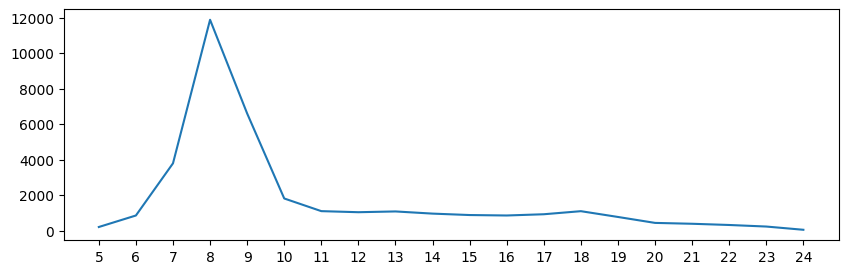

In [153]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot()
xx = range(5, 24+1)
ax.plot(xx, yy1)
ax.set_xticks(xx);

In [ ]:
mean_col = ['07시-08시', '08시-09시', '09시-10시', '17시-18시', '18시-19시', '19시-20시']
datetime = df['날짜']
df['mean'] = df[mean_col].sum(axis=1)
df_mean = df[['날짜', 'mean']]



<Axes: >

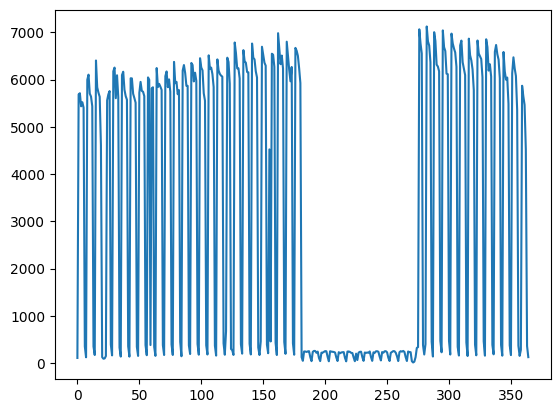

In [ ]:
df['07시-08시'].plot()

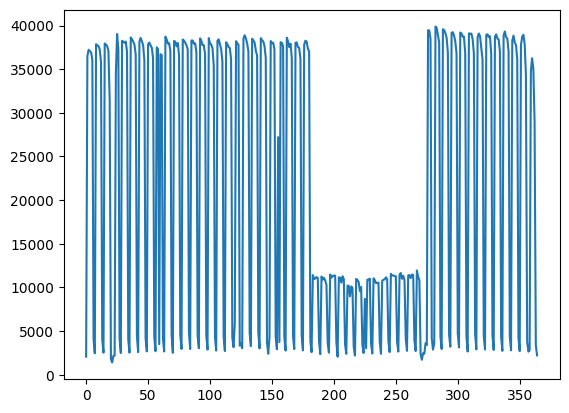

In [ ]:
plt.plot(df['mean'])